                                  Level 3 - Task 3: Price Range vs. Online Delivery and Table Booking
                                 Importing required Modules for Data Manipulation, Cleaning & Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

print("Imported Successfully")

Imported Successfully


In [6]:
# Loading data from dataset
data = pd.read_csv('Dataset.csv')

# columns present in dataset
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


   Price range  Online_Delivery  Table_Reservation
0            1        15.774077           0.022502
1            2        41.310633           7.677482
2            3        29.190341          45.738636
3            4         9.044369          46.757679


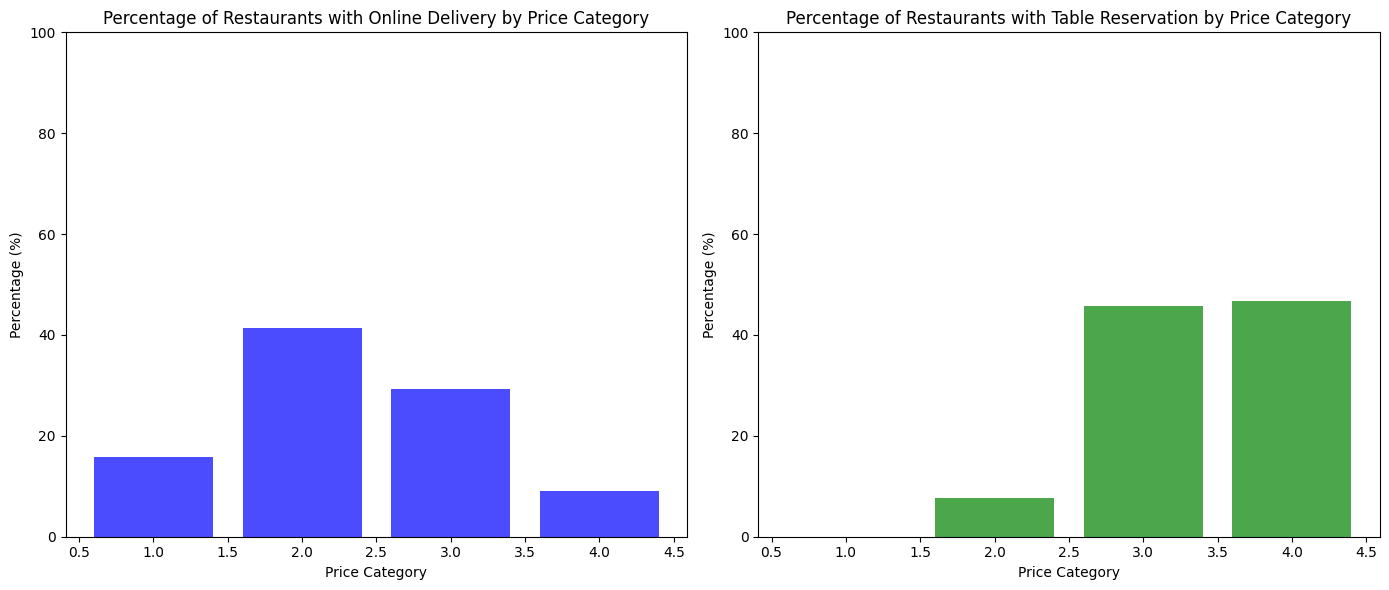

In [7]:
     # Question 1 - Analyze if there is a relationship between the price category and the availability of online delivery and table reservation.

# Step 1: Convert 'Yes'/'No' values to boolean (True/False) for easier analysis
data['Online_Delivery'] = data['Has Online delivery'].map({'Yes': True, 'No': False})
data['Table_Reservation'] = data['Has Table booking'].map({'Yes': True, 'No': False})

# Step 2: Group data by 'Price range' and calculate the percentage of restaurants 
# that offer online delivery and table reservation in each price category.
price_summary = data.groupby('Price range').agg({
    'Online_Delivery': 'mean',
    'Table_Reservation': 'mean'
}).reset_index()

# Convert the mean values into percentages
price_summary['Online_Delivery'] = price_summary['Online_Delivery'] * 100
price_summary['Table_Reservation'] = price_summary['Table_Reservation'] * 100

# Display the summary table
print(price_summary)

# Step 3: Visualize the relationship using bar plots
plt.figure(figsize=(14, 6))

# Plot for Online Delivery
plt.subplot(1, 2, 1)
plt.bar(price_summary['Price range'], price_summary['Online_Delivery'], color='blue', alpha=0.7)
plt.title('Percentage of Restaurants with Online Delivery by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Plot for Table Reservation
plt.subplot(1, 2, 2)
plt.bar(price_summary['Price range'], price_summary['Table_Reservation'], color='green', alpha=0.7)
plt.title('Percentage of Restaurants with Table Reservation by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


Average percentage of online delivery in higher-priced restaurants: 19.12%
Average percentage of table booking in higher-priced restaurants: 46.25%
Average percentage of online delivery in lower-priced restaurants: 28.54%
Average percentage of table booking in lower-priced restaurants: 3.85%


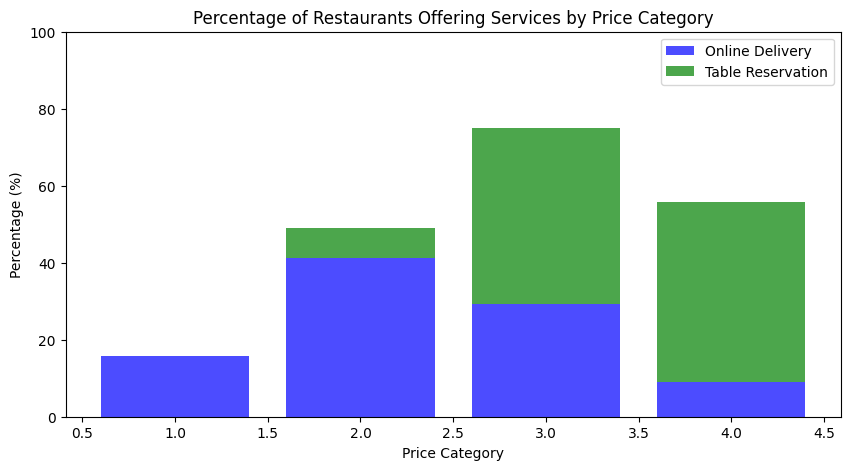

In [8]:
# Question 2 - Determine if higher-priced restaurants are more likely to offer online delivery and table booking.

# Step 1: Categorize restaurants into higher and lower price groups
# Assuming price range 3 and 4 are higher-priced, and 1 and 2 are lower-priced
high_price_restaurants = price_summary[price_summary['Price range'] >= 3]
low_price_restaurants = price_summary[price_summary['Price range'] < 3]

# Step 2: Calculate the average percentage of restaurants offering online delivery and table booking for both groups
avg_online_delivery_high = high_price_restaurants['Online_Delivery'].mean()
avg_table_booking_high = high_price_restaurants['Table_Reservation'].mean()

avg_online_delivery_low = low_price_restaurants['Online_Delivery'].mean()
avg_table_booking_low = low_price_restaurants['Table_Reservation'].mean()

# Step 3: Display the calculated averages
print(f"Average percentage of online delivery in higher-priced restaurants: {avg_online_delivery_high:.2f}%")
print(f"Average percentage of table booking in higher-priced restaurants: {avg_table_booking_high:.2f}%")
print(f"Average percentage of online delivery in lower-priced restaurants: {avg_online_delivery_low:.2f}%")
print(f"Average percentage of table booking in lower-priced restaurants: {avg_table_booking_low:.2f}%")

# Step 4: Visualize the percentage of restaurants offering services based on price category
plt.figure(figsize=(10, 5))

# Stacked bar chart to compare online delivery and table booking across price categories
plt.bar(price_summary['Price range'], price_summary['Online_Delivery'], color='blue', alpha=0.7, label='Online Delivery')
plt.bar(price_summary['Price range'], price_summary['Table_Reservation'], color='green', alpha=0.7, label='Table Reservation', 
        bottom=price_summary['Online_Delivery'])  # Stacked bars

plt.title('Percentage of Restaurants Offering Services by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend()

plt.show()
